In [143]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
# Set default setting of seaborn
sns.set()
import statsmodels.api as sm


SyntaxError: invalid syntax (<ipython-input-143-60b0c454d318>, line 9)

In [144]:
pip install tabulate

In [2]:
raw_data = pd.read_csv('data.csv')

In [3]:
raw_data

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024


In [4]:
pd.set_option('display.max_rows', None)

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
raw_data.value_counts("origin") # count of the unique data of origin

origin
1    249
3     79
2     70
dtype: int64

In [7]:
data = raw_data.copy(deep = True) # created a copy to do experiment

In [8]:
data.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [9]:
raw_data.isnull().sum() #counting total no of the missing values

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [10]:
#converting horse power data type to numbers data type
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [11]:
#droping or selecting the rows which have dont have have question mark in it .. we are indirectly droping the rows having the question mark
data = data[data.horsepower != "?"]

In [12]:
data.shape

(392, 9)

In [13]:
#now changing the data type of the horsepower from object to float
data.horsepower = data.horsepower.astype('float')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    int64  
 1   cylinders            392 non-null    int64  
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   year                 392 non-null    int64  
 7   name                 392 non-null    object 
 8   Kilometer_per_liter  392 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [15]:
#On to preparing the categorical features :

   # model_year is ordinal. So we simply stick to dtype int.
   # origin is a true categorical. We need to one hot encode it later.
   # name actually contains two useful bits of information: the cars manufacturer and the model. We split that into two new columns.



In [16]:
data_1 = data.copy(deep = True)

In [17]:
data_1.origin = data_1.origin.astype('object')

In [18]:
# split() with expand=True yields one column per list element
# we only split on the first space by setting n=1
data_1[["manufacturer", "model"]] = data_1["name"].str.split(" ", n=1, expand=True)
data_1.drop("name", axis=1, inplace=True)
data_1.head(1).T # to display in the list format


,0
origin,1
cylinders,8
displacement,307.0
horsepower,130.0
weight,3504
acceleration,12.0
year,1970
Kilometer_per_liter,7.652587
manufacturer,chevrolet
model,chevelle malibu


In [19]:
# we can display in the normal way tooo

data_1.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,manufacturer,model
0,1,8,307.0,130.0,3504,12.0,1970,7.652587,chevrolet,chevelle malibu
1,1,8,350.0,165.0,3693,11.5,1970,6.377156,buick,skylark 320
2,1,8,318.0,150.0,3436,11.0,1970,7.652587,plymouth,satellite
3,1,8,304.0,150.0,3433,12.0,1970,6.802299,amc,rebel sst
4,1,8,302.0,140.0,3449,10.5,1970,7.227443,ford,torino


In [20]:
print(sorted(data_1.manufacturer.unique()))

['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevroelt', 'chevrolet', 'chevy', 'chrysler', 'datsun', 'dodge', 'fiat', 'ford', 'hi', 'honda', 'maxda', 'mazda', 'mercedes', 'mercedes-benz', 'mercury', 'nissan', 'oldsmobile', 'opel', 'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'triumph', 'vokswagen', 'volkswagen', 'volvo', 'vw']


In [21]:
# There are several errors in the manufacturers names. E.g. «vokswagen», «maxda» etc. 
#We fix these by replacing the wrong entries. We also fix some synomyms like «vw».
errors = {
         "vokswagen" : "volkswagen", 
         "vw" : "volkswagen", 
         "toyouta" : "toyota", 
         "mercedes-benz" : "mercedes", 
         "chevroelt": "chevrolet",
         "chevy" : "chevrolet", 
         "maxda" : "mazda"
         }

data_1.manufacturer = data_1.manufacturer.map(errors).fillna(data_1.manufacturer) #here we are maping the newly created the dictionary 
# here we are using fillna because all the values where the error are will be replaced by the respective value from the dictionary but where there is no error and the correct values are ther that will be changed to the nan and so we have to fill the nan with the same correct values and we copy the same values.

In [22]:
print(sorted(data_1.manufacturer.unique()))

['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevrolet', 'chrysler', 'datsun', 'dodge', 'fiat', 'ford', 'hi', 'honda', 'mazda', 'mercedes', 'mercury', 'nissan', 'oldsmobile', 'opel', 'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru', 'toyota', 'triumph', 'volkswagen', 'volvo']


In [23]:
data_1.model.unique()

array(['chevelle malibu', 'skylark 320', 'satellite', 'rebel sst',
       'torino', 'galaxie 500', 'impala', 'fury iii', 'catalina',
       'ambassador dpl', 'challenger se', "'cuda 340", 'monte carlo',
       'estate wagon (sw)', 'corona mark ii', 'duster', 'hornet',
       'maverick', 'pl510', '1131 deluxe sedan', '504', '100 ls', '99e',
       '2002', 'gremlin', 'f250', 'c20', 'd200', '1200d', 'vega 2300',
       'corona', 'satellite custom', 'torino 500', 'matador',
       'catalina brougham', 'monaco (sw)', 'country squire (sw)',
       'safari (sw)', 'hornet sportabout (sw)', 'vega (sw)', 'firebird',
       'mustang', 'capri 2000', '1900', '304', '124b', 'corolla 1200',
       '1200', 'model 111', 'cricket', 'corona hardtop', 'colt hardtop',
       'type 3', 'vega', 'pinto runabout', 'ambassador sst', 'marquis',
       'lesabre custom', 'delta 88 royale', 'newport royal', 'rx2 coupe',
       'matador (sw)', 'chevelle concours (sw)', 'gran torino (sw)',
       'satellite custom (s

In [24]:
#Some model names also seem redundant or wrong.

#Hand checking would be way too time-consuming so we only improve this features brute-force by removing all special characters.


In [25]:
import re
def alphanumeric(x):
    return re.sub('[^A-Za-z0-9]+', '', (str(x)))

data_1["model"] = data_1.model.apply(lambda x: alphanumeric(x))
#here apply function is used to go through all the data of the column and remove the special character.
#check for lambda funtion

In [26]:
print(len(data_1.model.unique()))

293


In [27]:
data_1.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,manufacturer,model
0,1,8,307.0,130.0,3504,12.0,1970,7.652587,chevrolet,chevellemalibu
1,1,8,350.0,165.0,3693,11.5,1970,6.377156,buick,skylark320
2,1,8,318.0,150.0,3436,11.0,1970,7.652587,plymouth,satellite
3,1,8,304.0,150.0,3433,12.0,1970,6.802299,amc,rebelsst
4,1,8,302.0,140.0,3449,10.5,1970,7.227443,ford,torino


In [28]:
#Here we take a look at the summary of each attribute. This includes the count, mean, the min and max values as well as some percentiles for numeric variables.

In [29]:
# In our dataset we have numerical variables. Now we check for summary statistics of all the variables
#For numerical variables, we use .describe(). For categorical variables we use describe(include='object'). 

In [30]:
# data frame with numerical features
data_1.describe()

,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,1975.979592,9.967885
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,3.318250
min,3.000000,68.000000,46.000000,1613.000000,8.000000,1970.000000,3.826293
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,1973.000000,7.227443
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,1976.000000,9.672019
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,1979.000000,12.329168
max,8.000000,455.000000,230.000000,5140.000000,24.800000,1982.000000,19.811697


In [31]:
# data frame with categorical features
data_1.describe(include='object')

,origin,manufacturer,model
count,392,392,392
unique,3,30,293
top,1,ford,pinto
freq,245,48,5


In [32]:
# 4. EDA


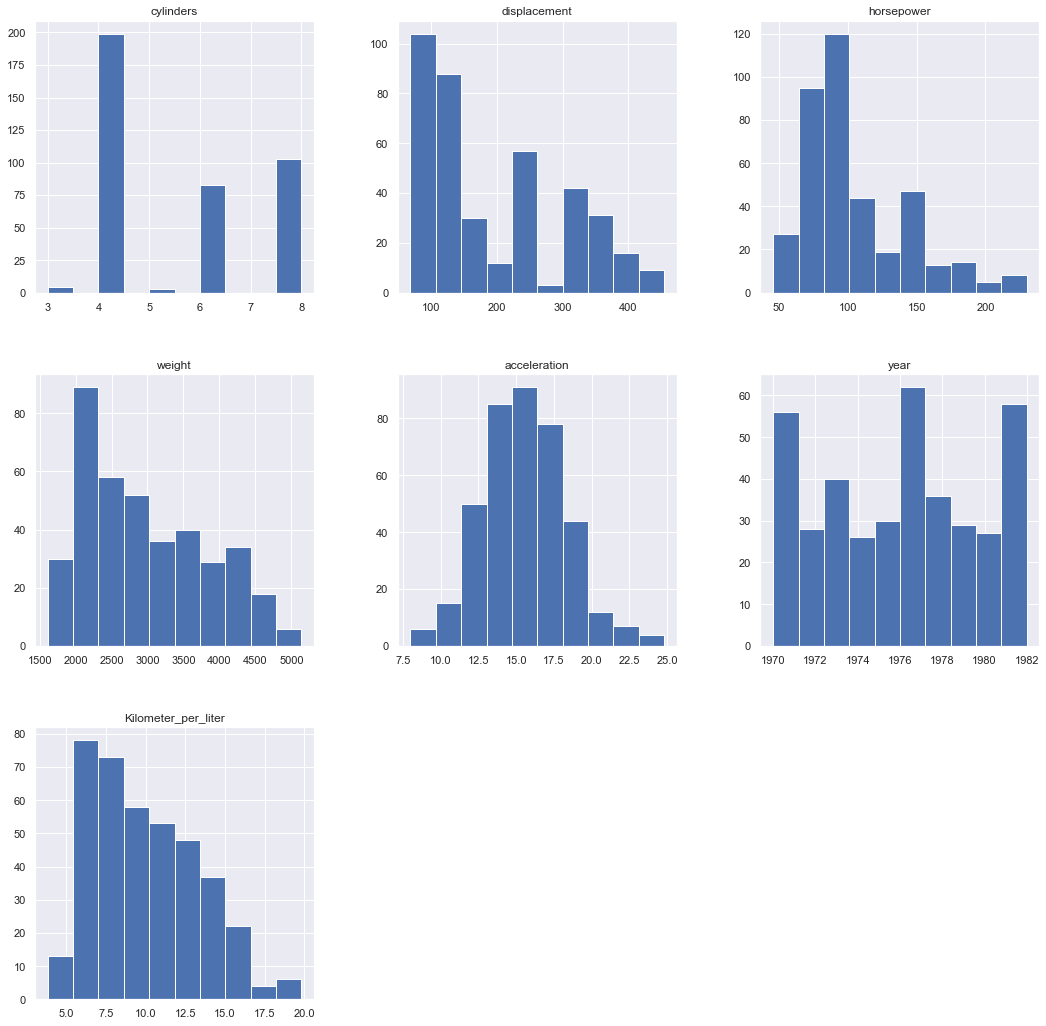

In [33]:
fig = data_1.hist(figsize = (18,18))

In [34]:
# Univariate Analysis

In [35]:
data_1.Kilometer_per_liter.describe()

count    392.000000
mean       9.967885
std        3.318250
min        3.826293
25%        7.227443
50%        9.672019
75%       12.329168
max       19.811697
Name: Kilometer_per_liter, dtype: float64

C:\Users\ABC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

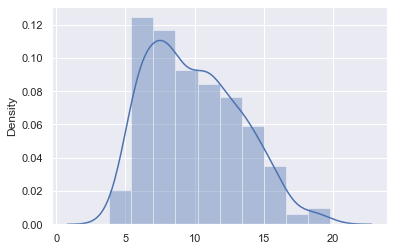

In [36]:
sns.distplot(x = data_1['Kilometer_per_liter'], bins = 10)

We expect that our data points will be on red line for gaussian distributin. We see dist tails


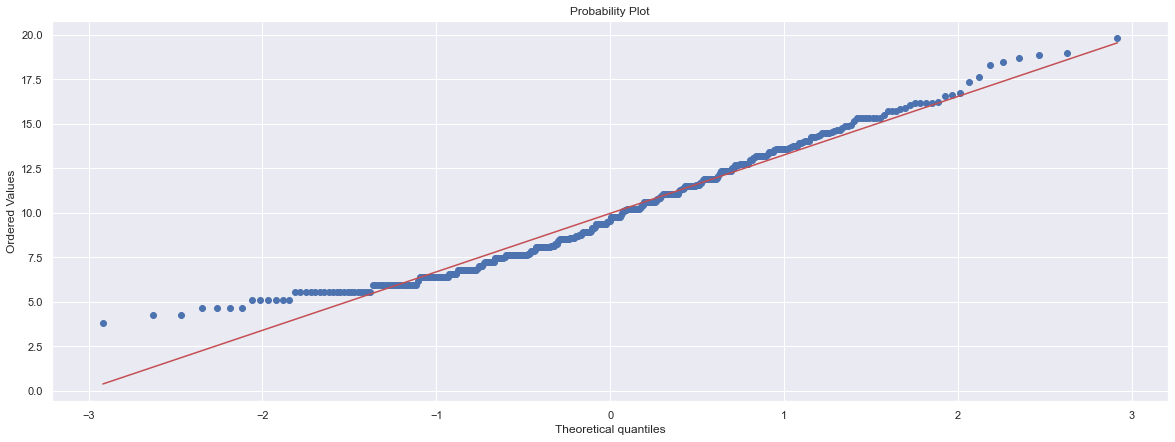

In [37]:
# qq plot:
plt.figure(figsize = (20,7))
stats.probplot(data["Kilometer_per_liter"],plot=plt)
plt.show
print("We expect that our data points will be on red line for gaussian distributin. We see dist tails")


In [38]:
print("Skewness: %f" % data['Kilometer_per_liter'].skew())
print("Kurtosis: %f" % data['Kilometer_per_liter'].kurt()) # to chek sckewness and kurtosis

Skewness: 0.457092
Kurtosis: -0.515993


In [39]:
data['Kilometer_per_liter'].skew()

0.45709232306040987

In [41]:
# as we see that kilometer per liter is not normally distributed we will do log transformation

In [42]:
data_log = data_1.copy(deep = True)

In [43]:
data_log.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,manufacturer,model
0,1,8,307.0,130.0,3504,12.0,1970,7.652587,chevrolet,chevellemalibu
1,1,8,350.0,165.0,3693,11.5,1970,6.377156,buick,skylark320
2,1,8,318.0,150.0,3436,11.0,1970,7.652587,plymouth,satellite
3,1,8,304.0,150.0,3433,12.0,1970,6.802299,amc,rebelsst
4,1,8,302.0,140.0,3449,10.5,1970,7.227443,ford,torino


In [44]:
data_log['Kmperliter_log'] = np.log(data_log['Kilometer_per_liter'])

In [45]:
data_log.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,manufacturer,model,Kmperliter_log
0,1,8,307.0,130.0,3504,12.0,1970,7.652587,chevrolet,chevellemalibu,2.035044
1,1,8,350.0,165.0,3693,11.5,1970,6.377156,buick,skylark320,1.852722
2,1,8,318.0,150.0,3436,11.0,1970,7.652587,plymouth,satellite,2.035044
3,1,8,304.0,150.0,3433,12.0,1970,6.802299,amc,rebelsst,1.917261
4,1,8,302.0,140.0,3449,10.5,1970,7.227443,ford,torino,1.977885


C:\Users\ABC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Kmperliter_log', ylabel='Density'>

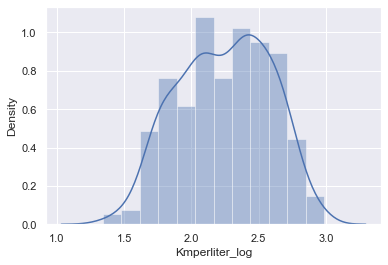

In [46]:
sns.distplot(data_log.Kmperliter_log)

We expect that our data points will be on red line for gaussian distributin. We see dist tails


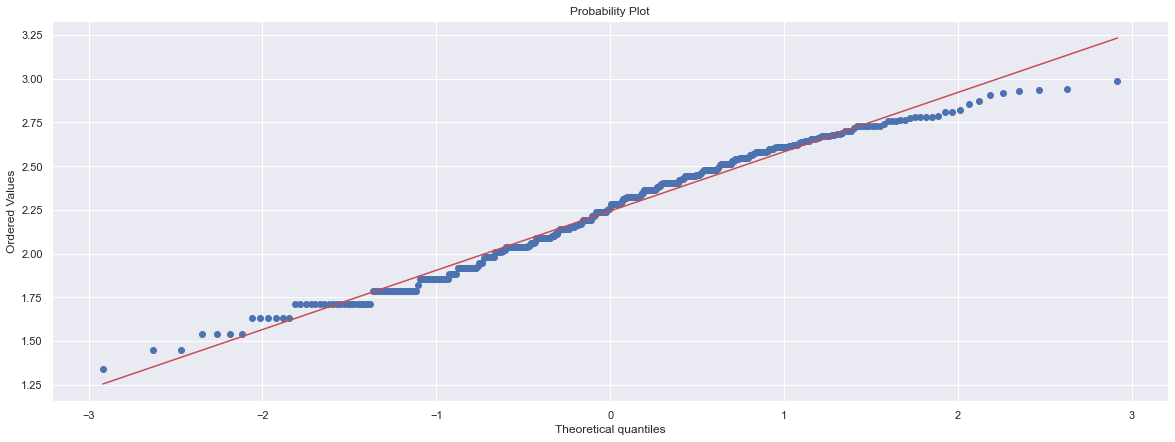

In [53]:
# qq plot using scipy
plt.figure(figsize = (20,7))
stats.probplot(data_log.Kmperliter_log,plot=plt)
plt.show
print("We expect that our data points will be on red line for gaussian distributin. We see dist tails")


In [54]:
# decribeing the displacment 
data_log.displacement.describe()

count    392.000000
mean     194.411990
std      104.644004
min       68.000000
25%      105.000000
50%      151.000000
75%      275.750000
max      455.000000
Name: displacement, dtype: float64

C:\Users\ABC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='displacement', ylabel='Density'>

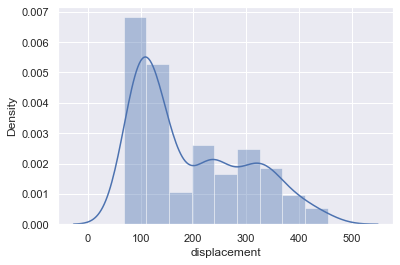

In [55]:
sns.distplot(data_log.displacement)

In [56]:
#Analysis of cylinders

In [57]:
data_log.cylinders.describe()

count    392.000000
mean       5.471939
std        1.705783
min        3.000000
25%        4.000000
50%        4.000000
75%        8.000000
max        8.000000
Name: cylinders, dtype: float64

In [58]:
data_log.cylinders.unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [59]:
# lets plot count plot 

C:\Users\ABC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cylinders', ylabel='count'>

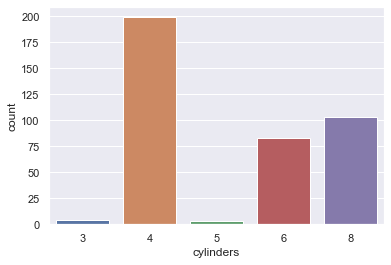

In [62]:
sns.countplot(data_log.cylinders)

In [63]:
#From above Countplot

    #From the above above plot we can visualize that there are maximum number of 4 cylinder vehicles.
    #Around 98% of the vehicles are either of 4, 6, 8 cylinders and only small percent of vehicles are either of 3 and 5 cylinders.
    #Cylinders is categorical, but in our dataset it is numerical.So changing type



In [64]:
data_3 = data_log.copy(deep = True)

In [65]:
data_3.cylinders = data_3.cylinders.astype('object')

In [66]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    object 
 1   cylinders            392 non-null    object 
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   year                 392 non-null    int64  
 7   Kilometer_per_liter  392 non-null    float64
 8   manufacturer         392 non-null    object 
 9   model                392 non-null    object 
 10  Kmperliter_log       392 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 44.9+ KB


In [67]:
# 4. Analysis of model year

C:\Users\ABC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


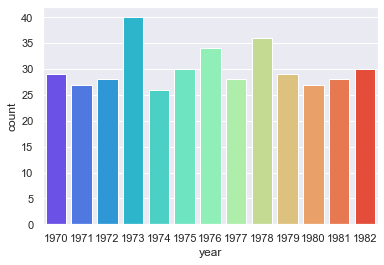

In [68]:
sns.countplot(data_3['year'],palette = "rainbow")
plt.show()

In [69]:
# 5. Analysis of Origin

C:\Users\ABC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


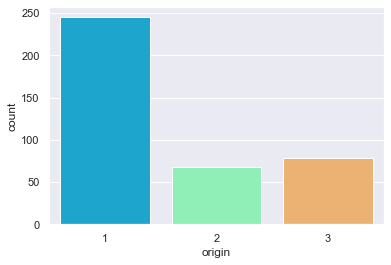

In [70]:
sns.countplot(data_3.origin,palette = "rainbow")
plt.show()

In [71]:
# Most of the vehicles are from region 1 as compared to the other two regions.


In [72]:
# 6. Analysis of Horsepower


C:\Users\ABC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='horsepower', ylabel='Density'>

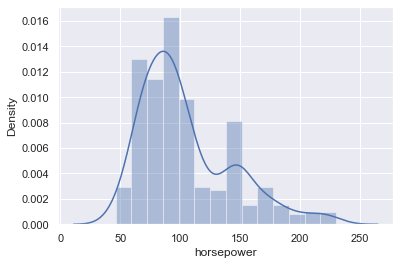

In [75]:
sns.distplot(data_3.horsepower)

In [99]:
#From above distribution

    #Horsepower rates the engine performance of cars
   # We can visualize that most of the vehicles have around 75-110 horsepower
   # And only few vehicles have horsepoer above 200.



C:\Users\ABC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='manufacturer', ylabel='count'>

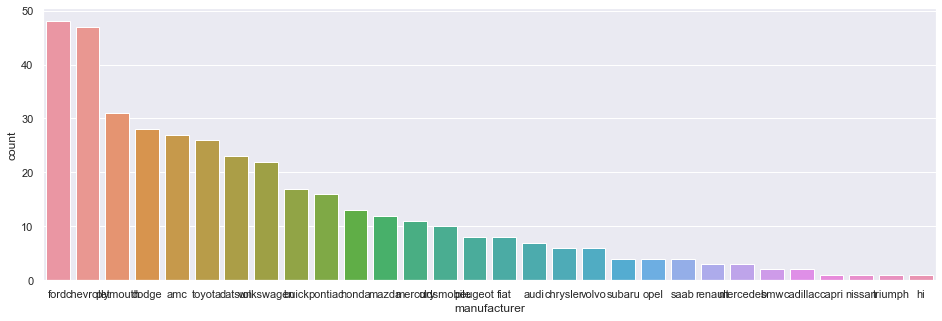

In [137]:
# 7. Analysis of Manufacturer
plt.figure(figsize=(16,5))

sns.countplot(data_3.manufacturer,order = data_3['manufacturer'].value_counts().index)

293 car models (Top 10)
--------  -
pinto     5
corolla   5
rabbit    5
matador   5
504       4
maverick  4
gremlin   4
hornet    4
corona    4
chevette  4
--------  -


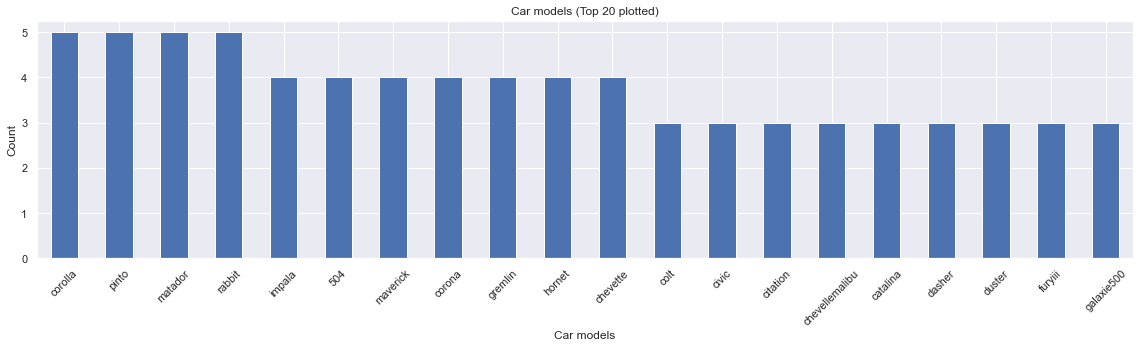

In [145]:
#8. Analysis of Model

from tabulate import tabulate
print(f"{data_3.model.nunique()} car models (Top 10)") # F string is used to  evaluates at runtime of the program, f-string allows us to evaluate expressions inside the string.
print(tabulate(pd.DataFrame(data_3.model.value_counts()[:10]))) #Pretty-print tabular data in Python, a library and a command-line utility.

plt.figure(figsize=(16,5));
data_3.groupby("model")["model"].count().sort_values(ascending=False)[:20].plot(kind="bar")
plt.title("Car models (Top 20 plotted)")
plt.ylabel("Count")
plt.xlabel("Car models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [146]:
# 4.2 Multivariate Analysis

In [150]:
#1. Analysis of kilometer_per_liter with horsepower
data_3.head(5)

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,manufacturer,model,Kmperliter_log
0,1,8,307.0,130.0,3504,12.0,1970,7.652587,chevrolet,chevellemalibu,2.035044
1,1,8,350.0,165.0,3693,11.5,1970,6.377156,buick,skylark320,1.852722
2,1,8,318.0,150.0,3436,11.0,1970,7.652587,plymouth,satellite,2.035044
3,1,8,304.0,150.0,3433,12.0,1970,6.802299,amc,rebelsst,1.917261
4,1,8,302.0,140.0,3449,10.5,1970,7.227443,ford,torino,1.977885


C:\Users\ABC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


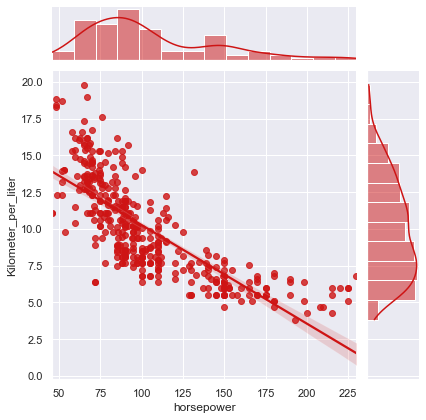

In [151]:
x = data_3[['Kilometer_per_liter','horsepower']]
sns.jointplot(x.loc[:,'horsepower'], x.loc[:,'Kilometer_per_liter'], kind="reg", color="#ce1414")

In [152]:
#We can see from the plot that as horsepower increase Kilpmeter_per_liter decreases.

In [153]:
# 2. Analysis of kilometer_per_liter with weight


C:\Users\ABC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


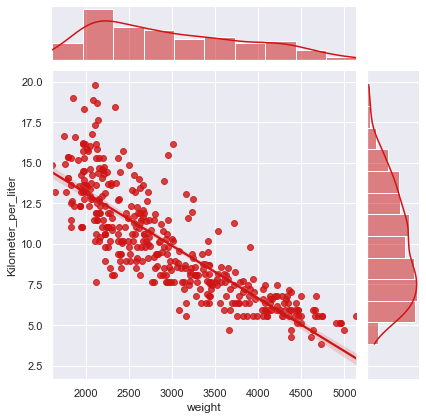

In [154]:
x = data_3[['Kilometer_per_liter','weight']]
sns.jointplot(x.loc[:,'weight'], x.loc[:,'Kilometer_per_liter'], kind="reg", color="#ce1414")

In [155]:
#3. Analysis of kilometer_per_liter with accleration

C:\Users\ABC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


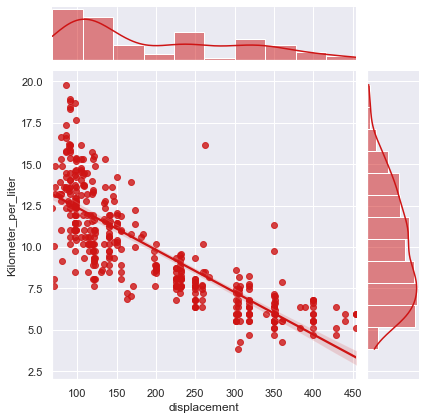

In [156]:
x = data_3[['Kilometer_per_liter','displacement']]
sns.jointplot(x.loc[:,'displacement'], x.loc[:,'Kilometer_per_liter'], kind="reg", color="#ce1414")

In [157]:
# From plot we can see a inverse relationship

In [158]:
# 5. Analysis of kilometer_per_liter with cylinders


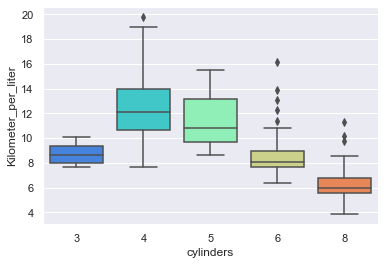

In [159]:
sns.boxplot(y='Kilometer_per_liter',x='cylinders',data=data_3,palette = "rainbow")
plt.show()

In [160]:
#We can easily visualize that the mileage per gallon (mpg) of 4 cylinder vehicles is maximum and we also saw that most of the vehicles are 4 cylinder.

In [161]:
# 6. Analysis of kilometer_per_liter with year

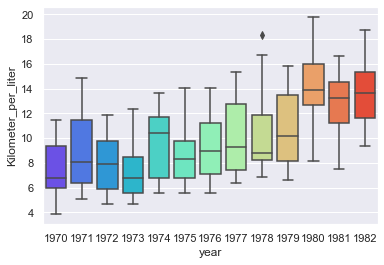

In [162]:
sns.boxplot(y='Kilometer_per_liter',x='year',data=data,palette = "rainbow")
plt.show()


In [163]:
#With every year and with the newer models of the vehicles mileage per gallon (mpg) also increases.


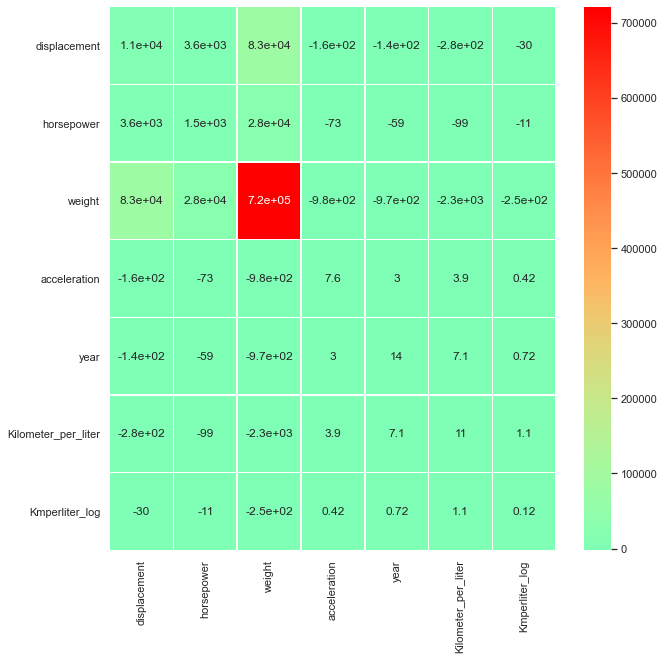

In [164]:
#Covariance
plt.figure(figsize=(10,10))
sns.heatmap(data_3.cov(),annot=True,linewidth=0.5,center=0,cmap='rainbow')
plt.show()

In [165]:
#A positive covariance means that asset returns move together while a negative covariance means they move inversely. 

In [166]:
# Correlation

In [168]:
# check correlation
data_num = data_3.drop(['Kilometer_per_liter','Kmperliter_log','origin'],axis = 1)
corr = data_num.corr()
corr

,displacement,horsepower,weight,acceleration,year
displacement,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,-0.543800,-0.689196,-0.416839,1.000000,0.290316
year,-0.369855,-0.416361,-0.309120,0.290316,1.000000


<AxesSubplot:>

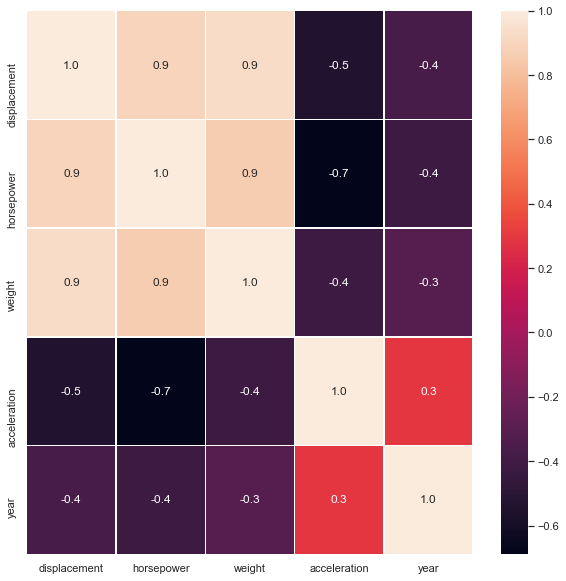

In [169]:
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data_num.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

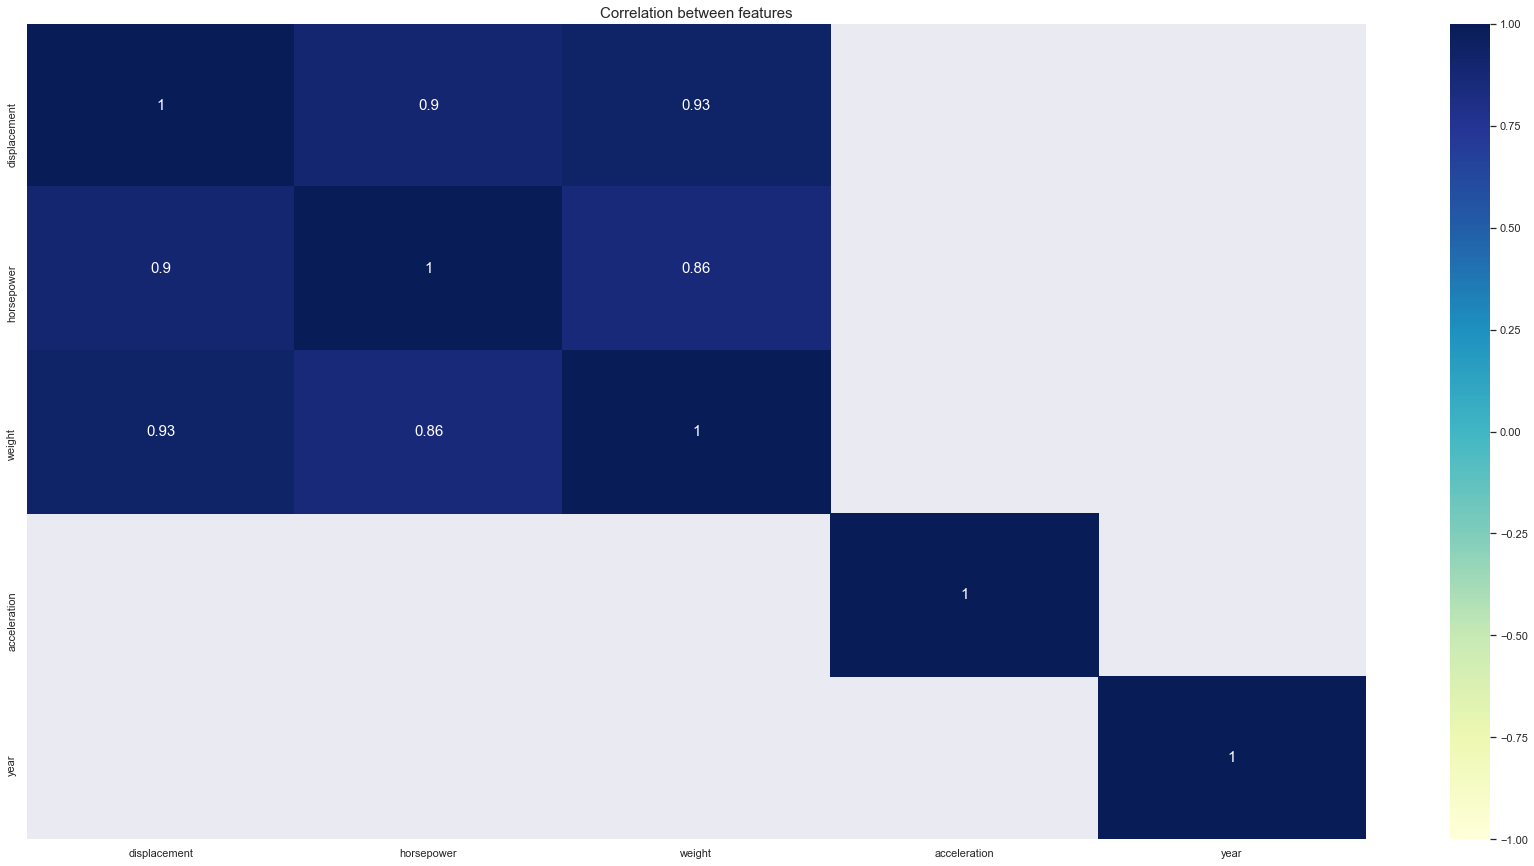

In [179]:
plt.figure(figsize=(30, 15))
sns.heatmap(corr[(corr >= 0.8) ], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0,
            annot=True, annot_kws={"size": 15})

plt.title('Correlation between features', fontsize=15)

plt.show()

In [180]:
#By looking at the correlation matrix we can see that variables 'displacement','weight' and 'horse' have a strong positive correlation with each other. 
#These feature pairs are strongly correlated to each other. 
#Ideally, we should not select these features together for training the model. 

In [192]:
drop_list = ['weight','displacement','manufacturer', 'model']
data_cleaned = data_3.drop(drop_list,axis = 1 )        
data_cleaned.head()

,origin,cylinders,horsepower,acceleration,year,Kilometer_per_liter,Kmperliter_log
0,1,8,130.0,12.0,1970,7.652587,2.035044
1,1,8,165.0,11.5,1970,6.377156,1.852722
2,1,8,150.0,11.0,1970,7.652587,2.035044
3,1,8,150.0,12.0,1970,6.802299,1.917261
4,1,8,140.0,10.5,1970,7.227443,1.977885


In [193]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    object 
 1   cylinders            392 non-null    object 
 2   horsepower           392 non-null    float64
 3   acceleration         392 non-null    float64
 4   year                 392 non-null    int64  
 5   Kilometer_per_liter  392 non-null    float64
 6   Kmperliter_log       392 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 32.6+ KB


In [198]:
data_cleaned["cylinders"] = data_cleaned["cylinders"].astype(int)

In [199]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    object 
 1   cylinders            392 non-null    int32  
 2   horsepower           392 non-null    float64
 3   acceleration         392 non-null    float64
 4   year                 392 non-null    int64  
 5   Kilometer_per_liter  392 non-null    float64
 6   Kmperliter_log       392 non-null    float64
dtypes: float64(4), int32(1), int64(1), object(1)
memory usage: 31.1+ KB


In [185]:
# Label Encoding of Categorical Data

In [200]:
data_with_dummies = pd.get_dummies(data_cleaned,drop_first=True)
data_with_dummies.head()

,cylinders,horsepower,acceleration,year,Kilometer_per_liter,Kmperliter_log,origin_2,origin_3
0,8,130.0,12.0,1970,7.652587,2.035044,0,0
1,8,165.0,11.5,1970,6.377156,1.852722,0,0
2,8,150.0,11.0,1970,7.652587,2.035044,0,0
3,8,150.0,12.0,1970,6.802299,1.917261,0,0
4,8,140.0,10.5,1970,7.227443,1.977885,0,0


In [201]:
# Standardise Data bringing data to same scale

In [202]:
from sklearn.preprocessing import MinMaxScaler

In [204]:
x = data_with_dummies.drop(['Kilometer_per_liter','Kmperliter_log'],axis = 1)

In [205]:
scaler = MinMaxScaler()
scaler.fit(x)

MinMaxScaler()

In [207]:
X = scaler.fit_transform(x)

In [209]:
Y = data_with_dummies.Kmperliter_log

In [220]:
#Split data into train and test

In [222]:
from sklearn.model_selection import train_test_split
# let us now split the dataset into train & test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=10)

# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("y_train ",Y_train.shape)

# print the shape of 'y_test'
print("y_test ",Y_test.shape)

X_train  (313, 6)
X_test  (79, 6)
y_train  (313,)
y_test  (79,)


In [223]:
#Linear Regression

In [225]:
#Now we build a Linear regression model. We start with our data set gradually proceeding with our analysis

#In order to build a Linear regression model, we do the following:
#1. Build the model
#2. Predict the values
#3. Compute the accuracy measures
#4. Tabulate the results 
# using sklearn

In [227]:
from sklearn.linear_model import LinearRegression
# build the model
OLS_model = LinearRegression()

# fit the model
OLS_model.fit(X_train, Y_train)

LinearRegression()

In [229]:
# predict the values
Y_pred_OLS = OLS_model.predict(X_test)

In [231]:
Y_pred_OLS.shape

(79,)

In [232]:
# Before we compute accuracy let's plot the predicted values

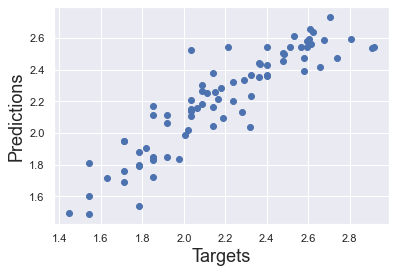

In [233]:
plt.scatter(Y_test,Y_pred_OLS)
plt.xlabel('Targets' ,size = 18)
plt.ylabel('Predictions',size = 18)
plt.show()

In [234]:
# Compute accuracy measures

In [235]:
# compute the R-Squared
r_squared_OLS = OLS_model.score(X_train,Y_train)

# Number of observation or sample size
n = 313 

# No of independent variables
p = 9

#Compute Adj-R-Squared
Adj_r_squared_OLS = 1 - (1-r_squared_OLS)*(n-1)/(n-p-1)

# Compute RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_OLS = sqrt(mean_squared_error(Y_test, Y_pred_OLS))

In [236]:
# Tabulate the results

In [237]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', ''R-squared', 'Adj R-squared', 'RMSE'

# create a list of column names
cols = ['Model', 'R-squared', 'Adj R-squared', 'RMSE']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
OLS_metrics = pd.Series({'Model': "OLS",
                 'R-squared' : r_squared_OLS, 'Adj R-squared' : Adj_r_squared_OLS , 'RMSE' :rmse_OLS})



# appending our result table
result_tabulation = result_tabulation.append(OLS_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,R-squared,Adj R-squared,RMSE
0,OLS,0.847115,0.842574,0.153305


In [238]:
# Linear Regression using SGD

In [239]:
#Now we build a Linear regression model using SGD Regressor. We start with our original data set gradually proceeding with our analysis

#In order to build a Linear regression model using SGD Regressor, we do the following:
#1. Build the model
#2. Predict the values
#3. Compute the accuracy measures
#4. Tabulate the results 

In [240]:
from sklearn.linear_model import SGDRegressor

# build the model
SGD_model = SGDRegressor(loss="squared_loss",alpha = 0.1, max_iter = 1000)

# fit the model
SGD_model.fit(X_train, Y_train)

SGDRegressor(alpha=0.1)

In [241]:
# predict the values
Y_pred_SGD  = SGD_model.predict(X_test)

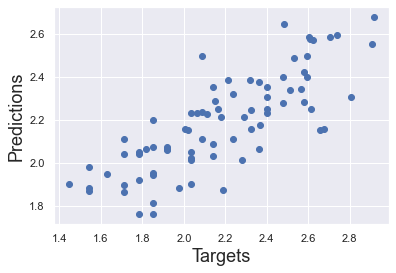

In [242]:
# Before we compute accuracy let's plot the predicted values
plt.scatter(Y_test,Y_pred_SGD)
plt.xlabel('Targets' ,size = 18)
plt.ylabel('Predictions',size = 18)
plt.show()

In [244]:
# compute the R-Squared
r_squared_SGD = SGD_model.score(X_train,Y_train)

# Number of observation or sample size
n = 313 

# No of independent variables
p = 9

#Compute Adj-R-Squared
Adj_r_squared_SGD = 1 - (1-r_squared_SGD)*(n-1)/(n-p-1)

# Compute RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_SGD = sqrt(mean_squared_error(Y_test, Y_pred_SGD))


In [245]:
# compiling the required information
SGD_metrics = pd.Series({'Model': "SGD",
                 'R-squared' : r_squared_SGD, 'Adj R-squared' : Adj_r_squared_SGD , 'RMSE' :rmse_SGD})



# appending our result table
result_tabulation = result_tabulation.append(SGD_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,R-squared,Adj R-squared,RMSE
0,OLS,0.847115,0.842574,0.153305
1,SGD,0.553063,0.539787,0.220651


In [246]:
#It can be seen from the result tabulation, that accuracy measures for the OLS is better than SGD.